In [2]:
import numpy as np
import pandas as pd

In [3]:
train_1=pd.read_csv(r"D:\Rohan\ML\Datasets\web-traffic-time-series-forecasting\train_1.csv")

In [4]:
train_1.head()
train_1.shape

(145063, 551)

In [5]:
#mean imputation
visits_columns = train_1.columns.drop('Page')
means = train_1[visits_columns].mean()
train1_imputed = train_1.copy()
train1_imputed[visits_columns] = train1_imputed[visits_columns].fillna(means)
train1_imputed.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.000000,11.000000,5.000000,13.000000,14.0000,9.00000,9.000000,22.000000,26.000000,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.000000,14.000000,15.000000,18.000000,11.0000,13.00000,22.000000,11.000000,10.000000,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.000000,0.000000,1.000000,1.000000,0.0000,4.00000,0.000000,3.000000,4.000000,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.000000,13.000000,10.000000,94.000000,4.0000,26.00000,14.000000,9.000000,11.000000,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,1195.856567,1204.003638,1133.675969,1170.437324,1217.7693,1290.27319,1239.136754,1193.092122,1197.991772,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [6]:
#extracting a stationary time series and a non-stationary time series
stationary_page_name=train1_imputed["Page"][0]
stationary_page_row=train1_imputed[train1_imputed["Page"]==stationary_page_name]
stationary_time_series=stationary_page_row.drop(columns=["Page"])
stationary_time_series=stationary_time_series.values.flatten()


non_stationary_page_name=train1_imputed["Page"][145000]
nonstationary_page_row=train1_imputed[train1_imputed["Page"]==non_stationary_page_name]
nonstationary_time_series=nonstationary_page_row.drop(columns=["Page"])
nonstationary_time_series=nonstationary_time_series.values.flatten()

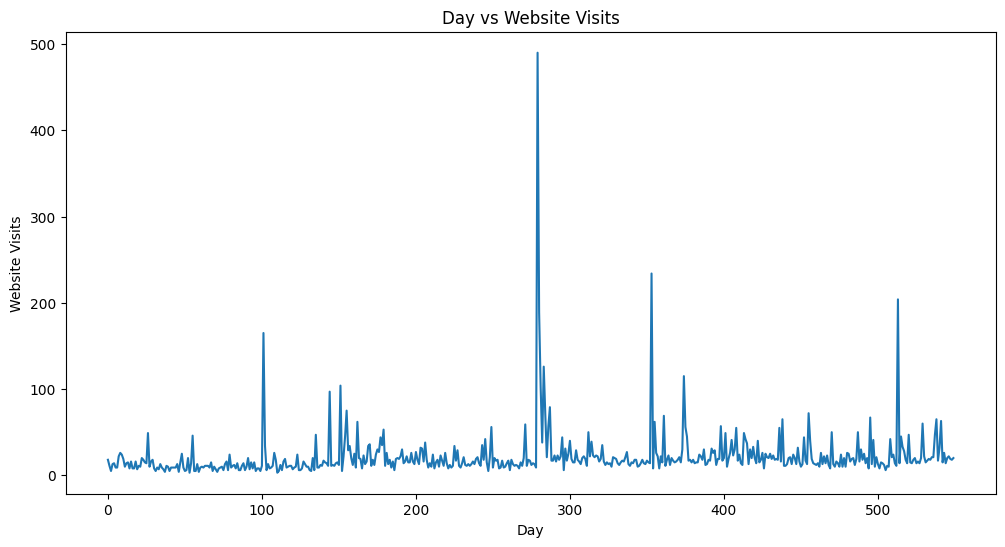

In [7]:
#visualizing data with outliers
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(stationary_time_series)
plt.xlabel('Day')
plt.ylabel('Website Visits')
plt.title('Day vs Website Visits')
plt.show()

In [8]:
#detecting outliers using zscore method and removing them
mean = np.mean(stationary_time_series)
std_dev = np.std(stationary_time_series)
z_scores = [(y - mean) / std_dev for y in stationary_time_series]
outliers = np.where(np.abs(z_scores) > 3)

outliers

(array([101, 279, 280, 283, 353, 374, 513], dtype=int64),)

In [9]:
stationary_time_series = np.delete(stationary_time_series, outliers)

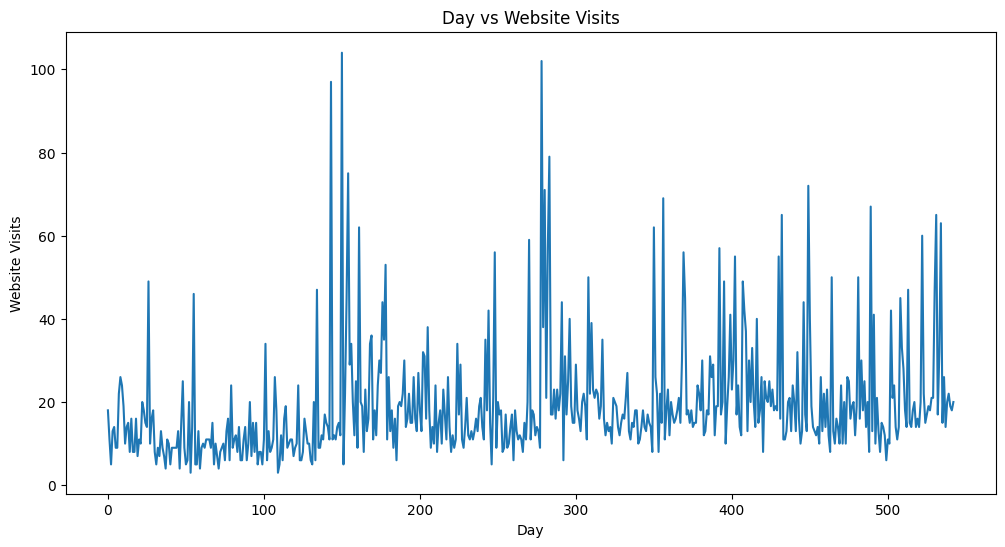

In [10]:
#visualizing data of 1 page after removing outliers

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(stationary_time_series)
plt.xlabel('Day')
plt.ylabel('Website Visits')
plt.title('Day vs Website Visits')
plt.show()


In [11]:
# checking whether data of 1 page is stationary or not
from arch.unitroot import ADF, PhillipsPerron
from statsmodels.tsa.stattools import kpss


# Perform ADF test
adf_test = ADF(stationary_time_series)
adf_stat = adf_test.stat
adf_pvalue = adf_test.pvalue
adf_critical_values = adf_test.critical_values


# Perform Phillips-Perron test
pp_test = PhillipsPerron(stationary_time_series)
pp_stat = pp_test.stat
pp_pvalue = pp_test.pvalue
pp_critical_values = pp_test.critical_values

# KPSS test
kpss_stat, kpss_pvalue, kpss_lags, kpss_critical_values= kpss(stationary_time_series, regression='c')



adf_result = adf_pvalue < 0.05
pp_result = pp_pvalue < 0.05
kpss_result = kpss_pvalue > 0.05


# Store results in a DataFrame
stationarity_results = pd.DataFrame({
    'Test': ['ADF', 'Phillips-Perron', 'KPSS'],
    'Statistic': [adf_stat, pp_stat, kpss_stat],
    'p-value': [adf_pvalue, pp_pvalue, kpss_pvalue],
    '1% Critical Value': [adf_critical_values.get('1%'), pp_critical_values.get('1%'), kpss_critical_values.get('1%')],
    '5% Critical Value': [adf_critical_values.get('5%'), pp_critical_values.get('5%'), kpss_critical_values.get('5%')],
    '10% Critical Value': [adf_critical_values.get('10%'), pp_critical_values.get('10%'), kpss_critical_values.get('10%')],
    'Stationarity': [adf_result, pp_result, kpss_result]
})

stationarity_results.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_15652\4158992202.py:20: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, kpss_pvalue, kpss_lags, kpss_critical_values= kpss(stationary_time_series, regression='c')


,Test,Statistic,p-value,1% Critical Value,5% Critical Value,10% Critical Value,Stationarity
0,ADF,-8.413415,2.074325e-13,-3.442541,-2.866917,-2.569634,True
1,Phillips-Perron,-24.108902,0.000000e+00,-3.442473,-2.866887,-2.569618,True
2,KPSS,1.398984,1.000000e-02,0.739000,0.463000,0.347000,False


In [12]:
stationary_time_series.shape

(543,)

In [13]:
nonstationary_time_series.shape

(550,)

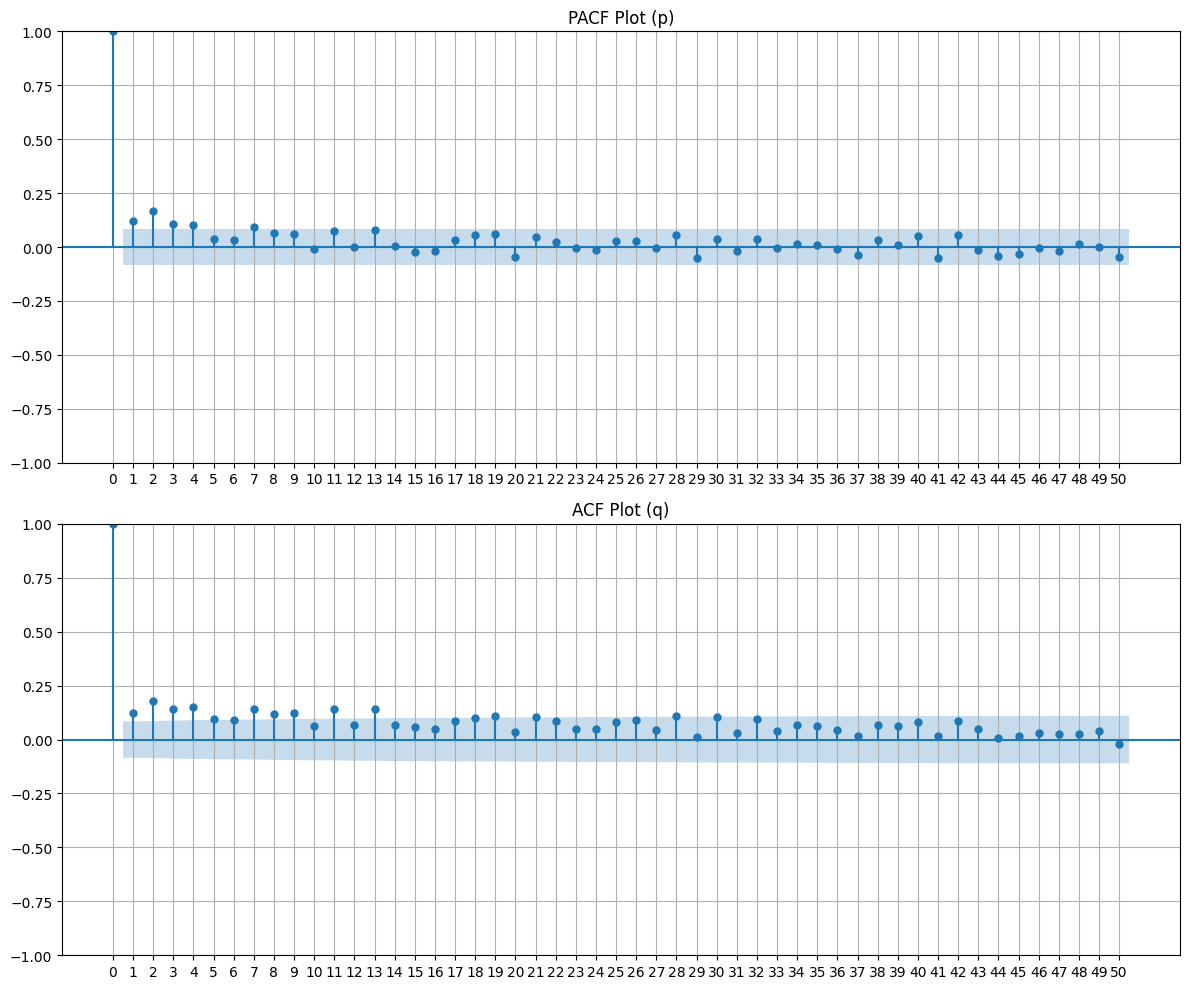

In [14]:
"""
p - PACF plot, point where plot cuts off
d - 0, since data is already stationary, no need to do differencing
q - ACF plot, point where plot cuts off

the cutoff value in a PACF plot is the value on x-axis where the values start getting in the highlighted range (confidence interval band)

If your time series has 550 observations, specifying lags=50 means that the partial autocorrelation will be calculated for the
first lag up to the 50th lag, taking into account all 550 data points for each lag's calculation.

"""

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(12, 10))

plot_pacf(stationary_time_series, lags=50, ax=ax[0])
ax[0].set_title('PACF Plot (p)')
ax[0].set_xticks(np.arange(0, 51, 1))
ax[0].grid(True)

plot_acf(stationary_time_series, lags=50, ax=ax[1])
ax[1].set_title('ACF Plot (q)')
ax[1].set_xticks(np.arange(0, 51, 1))
ax[1].grid(True)

plt.tight_layout()
plt.show()

# (p,d,q) is (3,0,3)

In [53]:
#for the stationary page
from statsmodels.tsa.arima.model import ARIMA


def fit_arima_single(time_series, order=(4, 1, 3)):
    model = ARIMA(time_series, order=order)
    model_fit = model.fit()
    
    return model_fit

# Example usage:
model_fit = fit_arima_single(stationary_time_series)
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  543
Model:                 ARIMA(4, 1, 3)   Log Likelihood               -2174.439
Date:                Sun, 04 Aug 2024   AIC                           4364.878
Time:                        16:57:58   BIC                           4399.240
Sample:                             0   HQIC                          4378.315
                                - 543                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4106      0.149      2.762      0.006       0.119       0.702
ar.L2         -0.7647      0.163     -4.700      0.000      -1.084      -0.446
ar.L3          0.0248      0.056      0.442      0.6

d:\Rohan\Freelancing\posterior_predictive\posterior_predictive\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


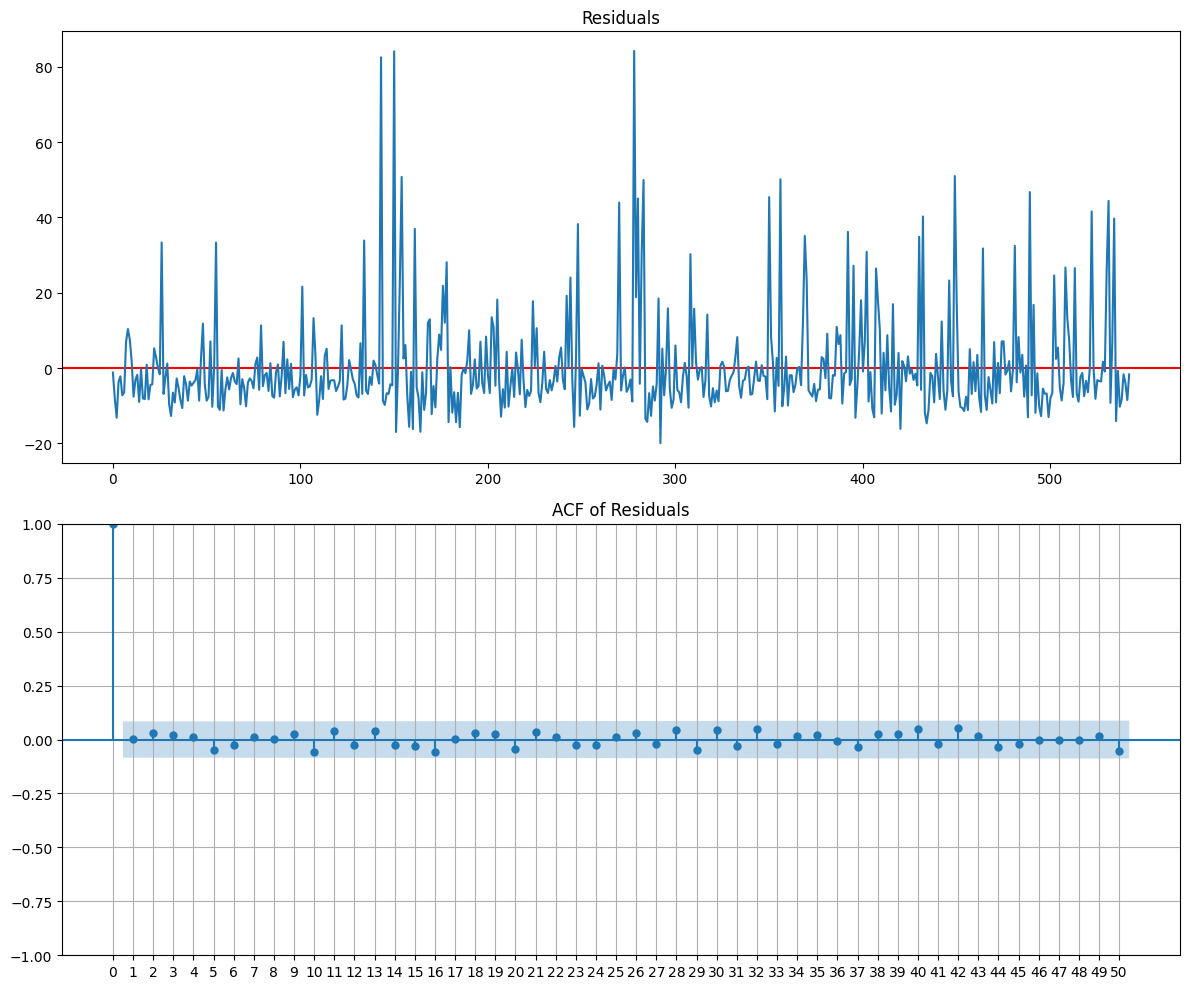

In [16]:
residuals = model_fit.resid

plt.figure(figsize=(12, 10))

# Plot the residuals
plt.subplot(2, 1, 1)
plt.axhline(y=0, color='red')
plt.plot(residuals)
plt.title('Residuals')

# Plot the ACF of the residuals
plt.subplot(2, 1, 2)
plt.grid(True)
plt.xticks(np.arange(0, 51, 1))
plot_acf(residuals, lags=50, ax=plt.gca())
plt.title('ACF of Residuals')

plt.tight_layout()
plt.show()

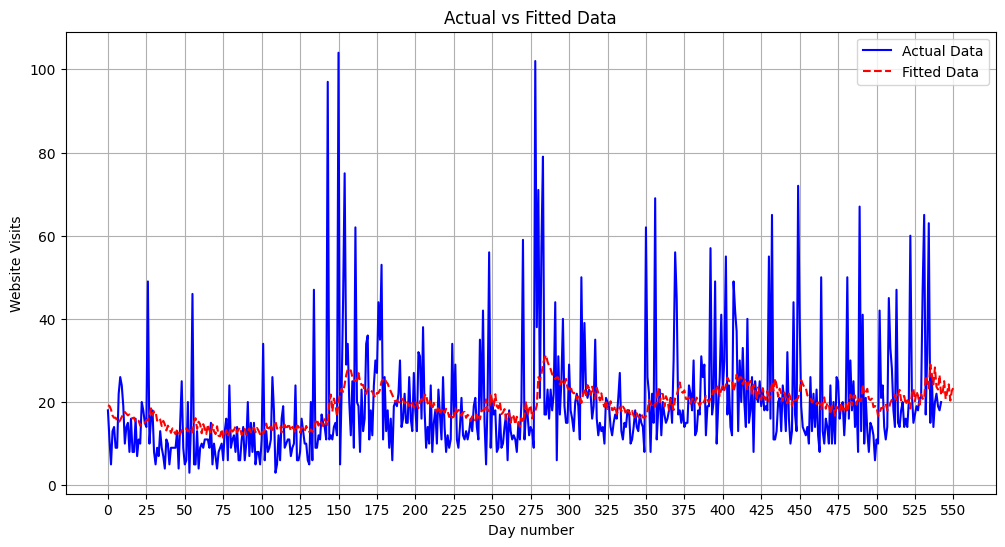

In [29]:
#displaying actual and predicted data

import matplotlib.pyplot as plt
import pandas as pd


forecast = model_fit.predict(start=0, end=550)

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(stationary_time_series, label='Actual Data', color='blue')
plt.plot(forecast, label='Fitted Data', color='red', linestyle='--')
plt.title('Actual vs Fitted Data')
plt.xlabel('Day number')
plt.ylabel('Website Visits')
plt.legend()
plt.xticks(np.arange(0, 551, 25))
plt.grid(True)
plt.show()


In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Evaluating the model on MAE, MSE, RMSE metrics

def evaluate_model(model_fit, time_series, forecast_steps):
    # Forecasting
    forecast = model_fit.get_forecast(steps=forecast_steps)
    forecast_mean = forecast.predicted_mean
    forecast_conf_int = forecast.conf_int()

    # Actual values for comparison
    actual_values = time_series[-forecast_steps:]

    # Calculate errors
    mae = mean_absolute_error(actual_values, forecast_mean)
    mse = mean_squared_error(actual_values, forecast_mean)
    rmse = np.sqrt(mse)
    
    # Calculate MAPE
    mape = np.mean(np.abs((actual_values - forecast_mean) / actual_values)) * 100
    
    # Compile results
    metrics = pd.DataFrame({
        'Metric': ['MAE (visits)', 'RMSE (visits)', 'MAPE (%)', 'MSE'],
        'Value': [mae, rmse, mape, mse]
    })
    
    return metrics

# Example usage:
forecast_steps = 20  # Adjust this based on your dataset and forecasting needs
metrics = evaluate_model(model_fit, stationary_time_series, forecast_steps)
print(metrics)

          Metric       Value
0   MAE (visits)    9.674005
1  RMSE (visits)   14.882965
2       MAPE (%)   33.489697
3            MSE  221.502650
